In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.varmax import VARMAX
import numpy as np
from statsmodels.tsa.stattools import adfuller
from sklearn import metrics
from timeit import default_timer as timer
import warnings
warnings.filterwarnings("ignore")

In [ ]:
df=pd.read_csv('/content/Busduct1_MFM_2024-02-07-18-59-40.csv')

In [ ]:
df.head(50)

,Timestamp,BUSDUCT1 Current R,BUSDUCT1 Current Y,BUSDUCT1 Current B,BUSDUCT1 VOL RY,BUSDUCT1 VOL YB,BUSDUCT1 VOL BR,BUSDUCT1 KW,BUSDUCT1 PF
0,2023-03-11 14:45:00,25.089851,23.117828,27.809412,417.192963,419.108429,419.375885,NaN,76.029658
1,2023-03-11 15:00:00,20.480844,18.777246,23.783428,415.622589,417.509216,417.893982,NaN,76.077837
2,2023-03-11 15:15:00,35.334042,32.967422,40.695690,411.941101,413.911316,413.914825,NaN,76.750880
3,2023-03-11 15:30:00,33.526539,31.230062,37.576008,408.533417,410.693115,410.623932,NaN,75.674164
4,2023-03-11 15:45:00,23.486351,21.534044,25.824032,407.508392,409.861328,409.816833,NaN,79.324406
5,2023-03-11 16:00:00,33.834000,31.623861,35.864727,411.933807,414.037445,413.713562,NaN,74.986750
6,2023-03-11 16:15:00,24.045349,22.064682,26.001427,413.359039,415.112061,415.316254,NaN,74.755597
7,2023-03-11 16:30:00,26.759689,24.505220,29.065264,415.323303,417.272827,417.507416,NaN,74.004620
8,2023-03-11 16:45:00,30.607605,28.147034,32.631687,417.143616,418.934326,419.435760,NaN,73.603928
9,2023-03-11 17:00:00,16.935652,14.826841,19.354816,417.799103,419.662018,420.000061,NaN,82.723403


In [ ]:
# prompt: Using dataframe df: varma forecasting complete the code

from statsmodels.tsa.statespace.varmax import VARMAX
model = VARMAX(df[['BUSDUCT1 Current R', 'BUSDUCT1 Current Y', 'BUSDUCT1 Current B']], order=(2, 0))
results = model.fit(disp=False)
forecast = results.forecast(steps=10)


In [ ]:
!pip install pmdarima

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 15.6 MB/s eta 0:00:00


In [ ]:
from pmdarima.model_selection import train_test_split

df = df[['BUSDUCT1 Current R', 'BUSDUCT1 Current Y', 'BUSDUCT1 Current B']].dropna()


train, test = train_test_split(df, train_size=0.8)

In [ ]:
from pmdarima import auto_arima

In [ ]:
model=VARMAX(train,order=(1,1))
results = model.fit(disp=False)

In [ ]:
n_forecast = len(test)
pred = results.get_forecast(steps=n_forecast)
pred_df = pred.predicted_mean
pred_df.index = test.index

In [ ]:
mse_r = mean_squared_error(test["BUSDUCT1 Current R"], pred_df["BUSDUCT1 Current R"])
mse_y = mean_squared_error(test["BUSDUCT1 Current Y"], pred_df["BUSDUCT1 Current Y"])
mse_b = mean_squared_error(test["BUSDUCT1 Current B"], pred_df["BUSDUCT1 Current B"])

print(f'MSE for BUSDUCT1 Current R: {mse_r}')
print(f'MSE for BUSDUCT1 Current Y: {mse_y}')
print(f'MSE for BUSDUCT1 Current B: {mse_b}')

MSE for BUSDUCT1 Current R: 52.537203865434805
MSE for BUSDUCT1 Current Y: 49.78275871134857
MSE for BUSDUCT1 Current B: 56.00928886724261


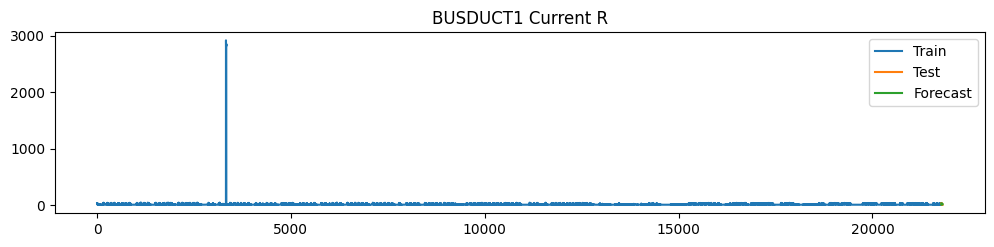

In [ ]:
plt.figure(figsize=(12, 8))

plt.subplot(311)
plt.plot(train.index, train["BUSDUCT1 Current R"], label='Train')
plt.plot(test.index, test["BUSDUCT1 Current R"], label='Test')
plt.plot(pred_df.index, pred_df["BUSDUCT1 Current R"], label='Forecast')
plt.title('BUSDUCT1 Current R')
plt.legend()

In [ ]:
plt.subplot(312)
plt.plot(train.index, train["BUSDUCT1 Current Y"], label='Train')
plt.plot(test.index, test["BUSDUCT1 Current Y"], label='Test')
plt.plot(pred_df.index, pred_df["BUSDUCT1 Current Y"], label='Forecast')
plt.title('BUSDUCT1 Current Y')
plt.legend()


In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
train_diff=train.diff()
train_diff.dropna(inplace=True)

In [ ]:
pq = []
for name, column in train_diff[[ 'BUSDUCT1 Current R', 'BUSDUCT1 Current Y', 'BUSDUCT1 Current B',  ]].iteritems():
    print(f'Searching order of p and q for : {name}')
    stepwise_model = auto_arima(train_diff[name],start_p=1, start_q=1,max_p=7, max_q=7, seasonal=False,
        trace=True,error_action='ignore',suppress_warnings=True, stepwise=True,maxiter=1000)
    parameter = stepwise_model.get_params().get('order')
    print(f'optimal order for:{name} is: {parameter} \n\n')
    pq.append(stepwise_model.get_params().get('order'))


AttributeError: 'DataFrame' object has no attribute 'iteritems'

In [ ]:
pq = []
for name, column in train_diff[[ 'BUSDUCT1 Current R', 'BUSDUCT1 Current Y', 'BUSDUCT1 Current B' ]].items():
    print(f'Searching order of p and q for : {name}')
    stepwise_model = auto_arima(train_diff[name],start_p=1, start_q=1,max_p=7, max_q=7, seasonal=False,
        trace=True,error_action='ignore',suppress_warnings=True, stepwise=True,maxiter=1000)
    parameter = stepwise_model.get_params().get('order')
    print(f'optimal order for:{name} is: {parameter} \n\n')
    pq.append(stepwise_model.get_params().get('order'))

In [ ]:
X = df[['BUSDUCT1 Current R', 'BUSDUCT1 Current Y', 'BUSDUCT1 Current B' ]]
train, test = X[0:-30], X[-30:]